#### FastAI and UNet (Validation/Test)
- Reference: https://www.youtube.com/watch?v=DKzL4zumFi8
- https://walkwithfastai.com/Segmentation

In [1]:
import os

%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES="4,5"

import numpy as np
from pathlib import Path

from fastai.vision.all import *
from fastai.vision.learner import load_learner

cwd = Path.cwd()
path = os.path.join(cwd, "battus10", "val_images")

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES="4,5"


/home/rahul/miniconda/envs/mothra/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
codes = np.loadtxt(os.path.join(path, "codes.txt"), dtype='str')
name2id = {v:k for k,v in enumerate(codes)}
files = get_image_files(os.path.join(path, "images"))
print("Total Images:", len(files), " \t Sample: ", files[0])
print("Annotations :", name2id)

Total Images: 2  	 Sample:  /home/rahul/workspace/vision/eeb/mothra/data/battus10/val_images/images/IMG_3870.JPG
Annotations : {'background': 0, 'lepidopteran': 1, 'tags': 2, 'ruler': 3}


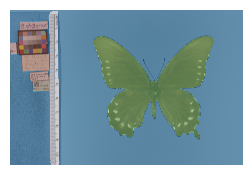

In [3]:
def label_func(image):
    """Function used to label images while training. Required by fastai."""
    return os.path.join(path, "labels", f"{image.stem}.png")

dls = SegmentationDataLoaders.from_label_func(path, bs=1, fnames=files, label_func=label_func, codes=codes)
dls.show_batch()

In [4]:
# Now, loading the model 
WEIGHTS_BIN = os.path.join(cwd, "battus10", "battus10_segmentation_test-4classes_resnet34_b2e20_v2.pkl")
print("Skip weight check and use the local weights: ", WEIGHTS_BIN)
learner = load_learner(fname=WEIGHTS_BIN)

Skip weight check and use the local weights:  /home/rahul/workspace/vision/eeb/mothra/data/battus10/battus10_segmentation_test-4classes_resnet34_b2e20_v2.pkl


RuntimeError: PytorchStreamReader failed locating file data.pkl: file not found

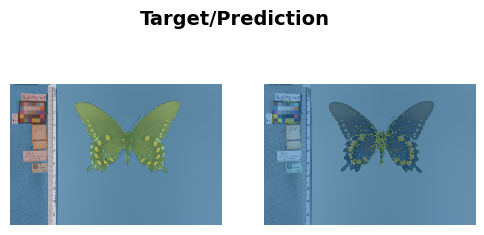

In [ ]:
learner.show_results(dl=dls)

In [ ]:
learner.tta(dl=dls)

(TensorBase([[[[5.8582e-01, 7.3710e-01, 8.5235e-01,  ..., 8.2186e-01,
                7.6917e-01, 6.1573e-01],
               [7.7047e-01, 9.1553e-01, 9.6617e-01,  ..., 9.6031e-01,
                9.2377e-01, 7.8001e-01],
               [8.1994e-01, 9.5724e-01, 9.8960e-01,  ..., 9.9099e-01,
                9.7144e-01, 8.5041e-01],
               ...,
               [7.2035e-01, 9.0047e-01, 9.6566e-01,  ..., 9.9417e-01,
                9.8299e-01, 9.0750e-01],
               [6.6824e-01, 8.5496e-01, 9.2978e-01,  ..., 9.7308e-01,
                9.3695e-01, 7.8504e-01],
               [5.3571e-01, 6.9349e-01, 7.9077e-01,  ..., 8.7873e-01,
                7.9493e-01, 6.1241e-01]],
 
              [[1.1888e-01, 7.0875e-02, 4.0048e-02,  ..., 6.1150e-02,
                7.7849e-02, 1.2647e-01],
               [5.9418e-02, 1.9527e-02, 7.3333e-03,  ..., 1.0985e-02,
                2.1938e-02, 6.3406e-02],
               [5.1400e-02, 1.0095e-02, 1.9666e-03,  ..., 2.6897e-03,
                6.8